TASK 3 PERFORMING EDA

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("train.csv")
df.head()#it displays first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print('Shape of the dataset:', df.shape)
df.info() #it gives information about dataset and what are the datatypes present
df.describe() #it gives information about how many rows coloumns present in the table

Shape of the dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(df.isnull().sum()) #shows how many missing values each col has and adds the missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
print('\nSurvived value counts:\n', df['Survived'].value_counts()) #displays how many people survived(1) and how many didn't
print('\nSex value counts:\n', df['Sex'].value_counts()) #Shows gender distribution in the dataset.
print('\nPclass value counts:\n', df['Pclass'].value_counts()) #Displays the number of passengers in each class.


Survived value counts:
 Survived
0    549
1    342
Name: count, dtype: int64

Sex value counts:
 Sex
male      577
female    314
Name: count, dtype: int64

Pclass value counts:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


PAIRPLOT

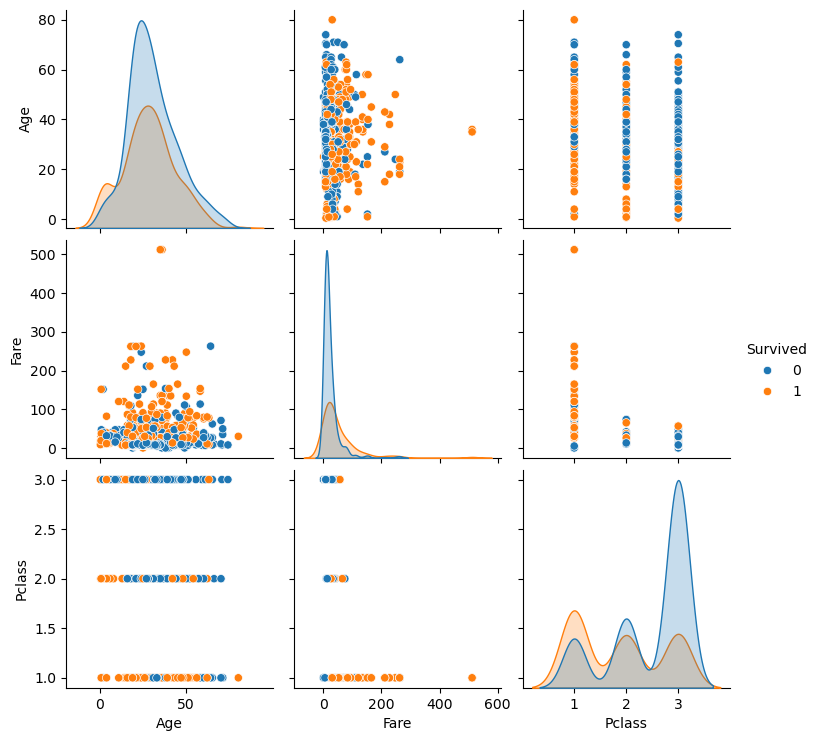

In [13]:
sns.pairplot(df[['Survived','Age','Fare','Pclass']].dropna(), hue='Survived')
plt.show()
#A pairplot generates: *Scatterplots between every pair of numeric columns
                       #*Histograms/KDEs on the diagonal for each variable

CORRELATION HEATMAP 

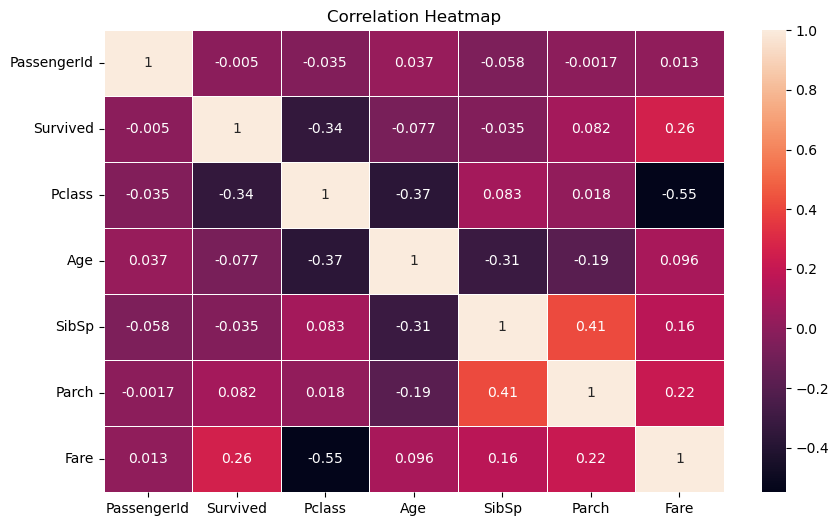

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()
#A correlation matrix is a square table showing pairwise correlation coefficients between numeric columns (each row and column is a variable).

HISTOGRAMS FOR (AGE,FARE)

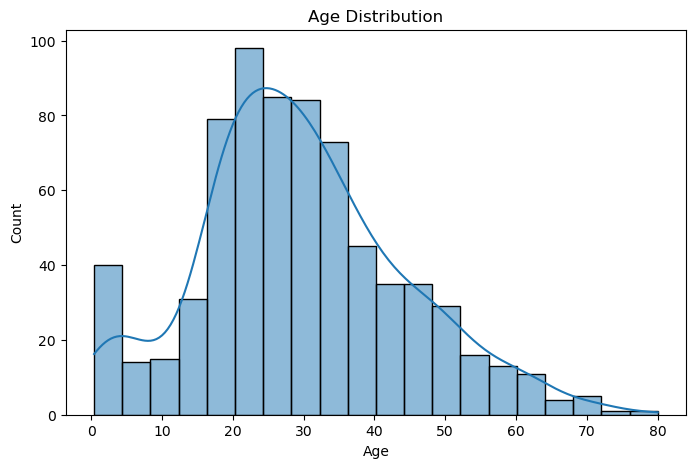

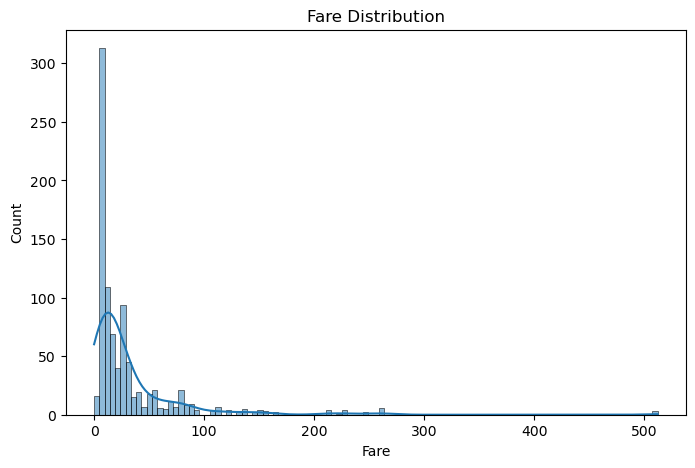

In [25]:
#This histogram for AGE
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True) #kde= KEREL DENSITY ESTIMATE curve which is a smooth line showing the distribution trend
plt.title("Age Distribution")
plt.show()

#This histogram for FARE
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'].dropna(), kde=True)
plt.title("Fare Distribution")
plt.show()


BOX PLOT FOR (Age,Survived,Pclass,Fare)

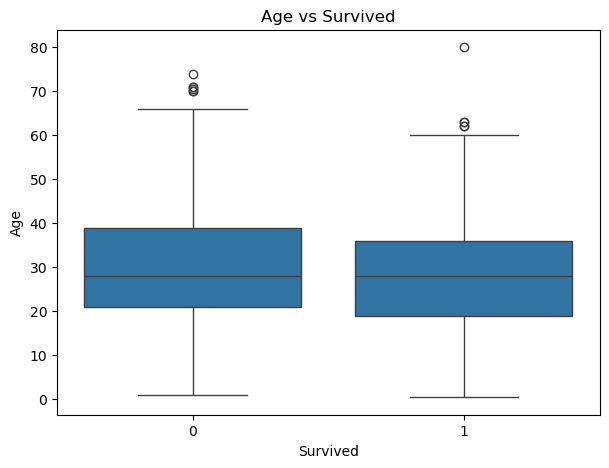

In [28]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survived")
plt.show()


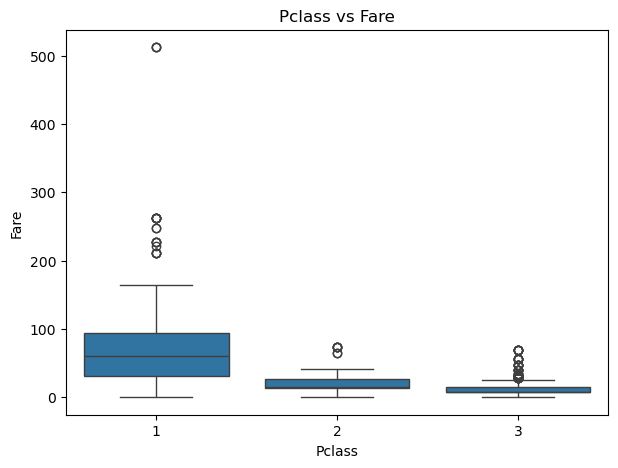

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Pclass vs Fare")
plt.show()


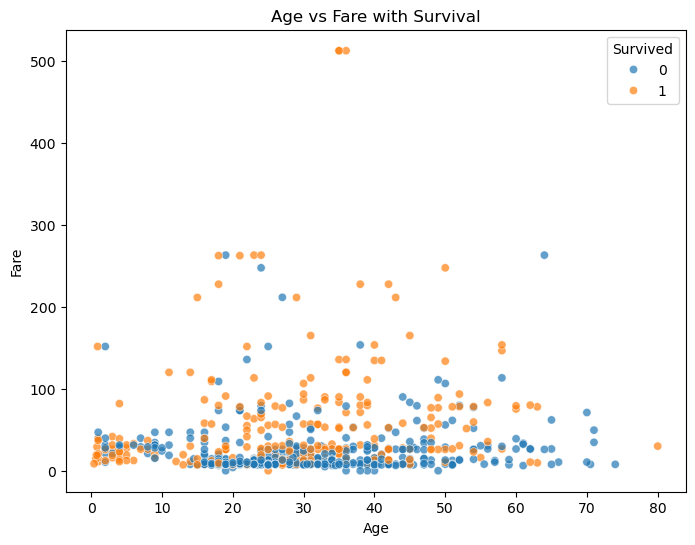

In [32]:
#SCATTERPLOT ffor age fare survived
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.7)
plt.title("Age vs Fare with Survival")
plt.show()


GROUP STATS

In [35]:
#Calculates survival rates by gender
print('Survival rate by Sex:')
print(df.groupby('Sex')['Survived'].mean())

#Calculates survival rates by passenger class
print('\nSurvival rate by Pclass:')
print(df.groupby('Pclass')['Survived'].mean())

#Calculates average fare by passenger class
print('\nAverage fare by Pclass:')
print(df.groupby('Pclass')['Fare'].mean())


Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Average fare by Pclass:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


NameError: name 'Sex' is not defined

<Figure size 700x500 with 0 Axes>